In [30]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("C:/Users/91969/Downloads/train.csv")
df.head(5)

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1


In [10]:
df.shape

(2000, 21)

In [11]:
df.info

<bound method DataFrame.info of       Battery_Power  Clock_Speed  FC  Int_Memory  Mobile_D  Mobile_W  Cores  \
0               842          2.2   1           7       0.6       188      2   
1              1021          0.5   0          53       0.7       136      3   
2               563          0.5   2          41       0.9       145      5   
3               615          2.5   0          10       0.8       131      6   
4              1821          1.2  13          44       0.6       141      2   
...             ...          ...  ..         ...       ...       ...    ...   
1995            794          0.5   0           2       0.8       106      6   
1996           1965          2.6   0          39       0.2       187      4   
1997           1911          0.9   1          36       0.7       108      8   
1998           1512          0.9   4          46       0.1       145      5   
1999            510          2.0   5          45       0.9       168      6   

      PC  Pixel_H  

In [12]:
df.describe(include='all')

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,...,12.306500,5.767000,11.011000,0.521500,0.761500,0.503000,0.509500,0.4950,0.507000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,...,4.213245,4.356398,5.463955,0.499662,0.426273,0.500116,0.500035,0.5001,0.500076,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,...,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,...,9.000000,2.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,...,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.0000,1.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,...,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,...,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,3.000000


In [13]:
df.isnull().sum()

Battery_Power    0
Clock_Speed      0
FC               0
Int_Memory       0
Mobile_D         0
Mobile_W         0
Cores            0
PC               0
Pixel_H          0
Pixel_W          0
Ram              0
Screen_H         0
Screen_W         0
Talk_Time        0
Four_G           0
Three_G          0
Touch_Screen     0
Dual_SIM         0
Bluetooth        0
WiFi             0
Price_Range      0
dtype: int64

We can see that there are no missing values in the dataset and all the variables are numerical variables.

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(2000, 21)

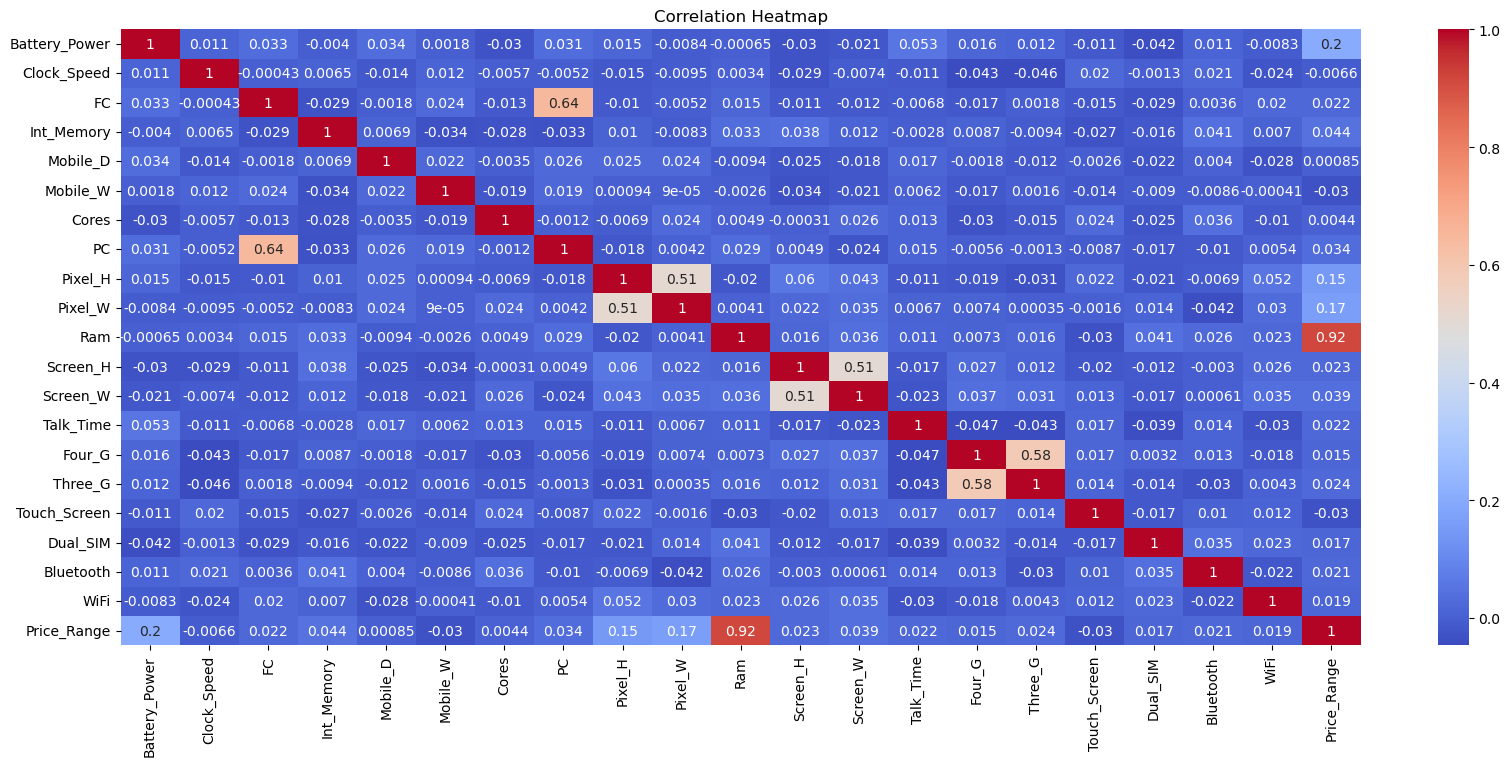

In [15]:
#correaltion 
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

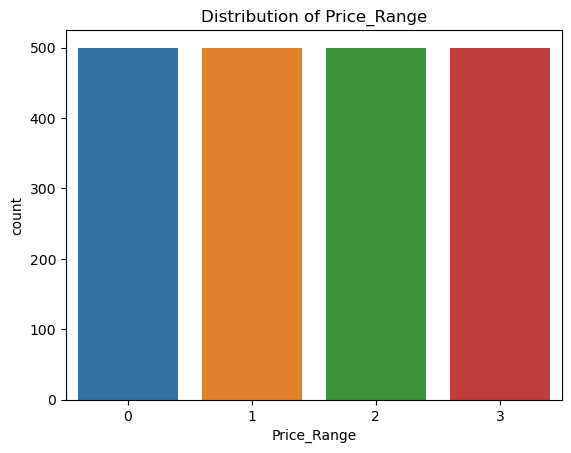

In [16]:
sns.countplot(x='Price_Range', data=df)
plt.title('Distribution of Price_Range')
plt.show()

**Splitting the Dataset**

In [17]:
X = df.drop('Price_Range', axis=1)
y = df['Price_Range']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [20]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [24]:
predictions = logmodel.predict(_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



**SVM MOdel**

In [16]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [17]:
#creating SVM classifiers with different values of C 
C_values=[0.1, 1 , 100, 1000]
for C in C_values:
    svm_model = SVC(kernel= 'linear', C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}: {accuracy}") 

Accuracy with C=0.1: 0.975
Accuracy with C=1: 0.97
Accuracy with C=100: 0.9725
Accuracy with C=1000: 0.9725


**Naive Bayes**

In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7975
F1 Score: 0.7955784167716806
